# Problem set 2: Descriptive economics

**Learning goals:**

- Using basic `pandas` DataFrame operations
- Clean and structure data
- Download real economic datasets using an API
- Merge and join data sets
- Compute summary statistics

**Table of contents**<a id='toc0_'></a>    
- 1. [Basic pandas](#toc1_)    
  - 1.1. [Dataframe](#toc1_1_)    
  - 1.2. [New variable](#toc1_2_)    
  - 1.3. [Indexing](#toc1_3_)    
  - 1.4. [Changing variables](#toc1_4_)    
  - 1.5. [Dropping observations and columns](#toc1_5_)    
  - 1.6. [Renaming](#toc1_6_)    
  - 1.7. [Income distribution](#toc1_7_)    
- 2. [National account identity](#toc2_)    
  - 2.1. [Download](#toc2_1_)    
  - 2.2. [Merge](#toc2_2_)    
  - 2.3. [Split-apply-combine-plot](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [115]:
# pip install numpy pandas matplotlib ipython
# eller alternativt (hvis fx pip ikke fungerer på jeres computer):
# conda install numpy pandas matplotlib ipython
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

# pip install git+https://github.com/alemartinello/dstapi
from dstapi import DstApi

## 1. <a id='toc1_'></a>[Basic pandas](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Dataframe](#toc0_)

Modify the code below such that *income* and *consumption* are variables in the *df* DataFrame.

In [116]:
np.random.seed(1999)
 
N = 100
mydata = {}
mydata['id'] = range(N)
mydata['income'] = np.exp(np.random.normal(size=N))
mydata['consumption'] = np.sqrt(mydata['income'])

df = pd.DataFrame(mydata)
df.head()

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712


In [117]:
display(df)

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712
...,...,...,...
95,95,0.201856,0.449284
96,96,2.368034,1.538842
97,97,2.389874,1.545922
98,98,1.488635,1.220096


### 1.2. <a id='toc1_2_'></a>[New variable](#toc0_)

Create a new variable *ratio* which is the ratio of consumption to income.

In [118]:
# write your code here
df['ratio'] = df['consumption'] / df['income']
df.head()

,id,income,consumption,ratio
0,0,0.727981,0.853218,1.172033
1,1,1.997831,1.413447,0.707490
2,2,0.276823,0.526140,1.900636
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513


### 1.3. <a id='toc1_3_'></a>[Indexing](#toc0_)

**Question a:** Select everybody: with an income above 1.

In [119]:
# write your code here
df[df['income'] > 1].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
6,6,2.574032,1.604379,0.623294
7,7,2.475478,1.573365,0.635580


**Question b:** Select everybody with an income *above* 1 and a ratio *above* 0.7.

In [120]:
# write your code here
df[(df['income'] > 1) & (df['ratio'] > 0.7)].head()
# eller
df[(df.income > 1) & (df.ratio > 0.7)].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
11,11,2.031708,1.425380,0.701567
18,18,1.280235,1.131475,0.883802


### 1.4. <a id='toc1_4_'></a>[Changing variables](#toc0_)

**Question a:** Set consumption equal to 0.5 if income is less than 0.5.

In [121]:
# write your code here
row_indexer = df['income'] < 0.5
df.loc[row_indexer, 'consumption'] = 0.5
# df['consumption'].mean() # <- compare with answer

**Question b:** Set consumption equal to income if income is less than 0.5.

In [122]:
# write your code here
row_indexer = df['income'] < 0.5
df.loc[row_indexer, 'consumption'] = df.loc[row_indexer, 'income']
# df['consumption'].mean() # <- compare with answer

### 1.5. <a id='toc1_5_'></a>[Dropping observations and columns](#toc0_)

Drop the *ratio* variable and all rows with an income above 1.5. After this, also drop the first 5 rows.

In [123]:
print(f'before: {df.shape[0]} observations, {df.shape[1]} variables')
# write your code here
df.drop('ratio', axis=1, inplace=True) # fjerner ration colonnem

row_indexer_todrop = df[df['income'] > 1.5].index # index over rækker vi vil fjerne
df.drop(row_indexer_todrop, axis=0, inplace=True) # fjerner dem (axis=0)

print(f'after: {df.shape[0]} observations, {df.shape[1]} variables')

before: 100 observations, 4 variables
after: 70 observations, 3 variables


### 1.6. <a id='toc1_6_'></a>[Renaming](#toc0_)

Rename *consumption* to *cons* and *income* to *inc*.

In [124]:
# write your code
df.rename(columns={'consumption':'cons', 'income':'inc'}, inplace=True)
df.head()

,id,inc,cons
0,0,0.727981,0.853218
2,2,0.276823,0.276823
3,3,1.481931,1.217346
4,4,1.235904,1.111712
5,5,0.662684,0.814054


In [125]:
N = 100
mydata = {}
mydata['id'] = range(N)
mydata['income'] = np.exp(np.random.normal(size=N))
mydata['consumption'] = np.sqrt(mydata['income'])

df_true = pd.DataFrame(mydata)

df_true = df_true.rename(columns={'income':'inc','consumption':'con'})
df_true.head()

,id,inc,con
0,0,0.599145,0.774044
1,1,0.469167,0.684957
2,2,1.435292,1.198037
3,3,2.504716,1.582629
4,4,0.156667,0.395811


### 1.7. <a id='toc1_7_'></a>[Income distribution](#toc0_)

Compute the share of income for each decile of the income distribution using the code below as a starting point.

In [126]:
deciles = df.quantile(np.linspace(0.1, 1, 11))['inc'].values  # 0 to 1 for 10 bins
df['income_decile'] = pd.cut(df['inc'], bins=deciles, labels=False, include_lowest=True)
income_shares = df.groupby('income_decile')['inc'].sum() / df['inc'].sum()
pd.DataFrame(income_shares)

,inc
income_decile,
0.0,0.041269
1.0,0.047933
2.0,0.056653
3.0,0.066490
4.0,0.080471
5.0,0.114334
6.0,0.108516
7.0,0.124652
8.0,0.142017


## 2. <a id='toc2_'></a>[National account identity](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Download](#toc0_)

Consider the following dictionary definitions:

In [127]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2020-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [128]:
nah1_api = DstApi('nah1') 
params = nah1_api._define_base_params(language='en')
display(params)
nah1 = nah1_api.get_data(params)
nah1

{'table': 'nah1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

,TRANSAKT,PRISENHED,TID,INDHOLD
0,D.21 Taxes on products,"2020-prices, chained values",1992,190426
1,D.21 Taxes on products,Current prices,1992,134646
2,D.21-D.31 Taxes less subsidies on products,"2020-prices, chained values",1992,178691
3,D.21-D.31 Taxes less subsidies on products,Current prices,1992,119558
4,D.31 Subsidies on products,"2020-prices, chained values",1992,12676
...,...,...,...,...
3535,P.72 Import of services,Current prices,2021,526100
3536,Supply for final demand,"2020-prices, chained values",2021,5890829
3537,Supply for final demand,Current prices,2021,6196545
3538,Uses,"2020-prices, chained values",2021,5890829


**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [129]:
# suppressing warnings about future changes to the pandas library
import warnings
warnings.filterwarnings('ignore')

nah1 = nah1.rename(columns=columns_dict)

for key,value in var_dict.items():
    nah1['variable'].replace({key:value}, inplace=True)

for key,value in unit_dict.items():
    nah1.unit.replace({key:value}, inplace=True)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [130]:
# write you code here
nah1 = nah1[nah1['variable'].isin(['Y','C','G','I','X','M'])].copy()
nah1['value'] = nah1['value'].astype(float)
nah1

,variable,unit,year,value
6,Y,real,1992,2318766.0
7,Y,nominal,1992,1489382.0
22,C,real,1992,1077013.0
23,C,nominal,1992,684847.0
24,G,real,1992,369532.0
...,...,...,...,...
3515,I,nominal,2021,611728.0
3524,X,real,2021,1379553.0
3525,X,nominal,2021,1511718.0
3530,M,real,2021,1259030.0


**Step 4:** Discuss what the following summary statistics show.

In [131]:
nah1.groupby(['variable','unit']).describe()

year                                                     \
                 count    mean        std     min     25%     50%     75%   
variable unit                                                               
C        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
G        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
I        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
M        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
X        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
Y        nominal  59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   
         real     59.0  1995.0  17.175564  1966.0  1980.5  1995.0  2009.5   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2024.0  59.0  8.461741e+05  5.652188e+05    62576.0   
         real     2024.0  59.0  1.189017e+06  3.326502e+05   587078.0   
G        nominal  2024.0  59.0  2.863408e+05  1.984273e+05    14768.0   
         real     2024.0  59.0  4.202840e+05  1.197782e+05   189310.0   
I        nominal  2024.0  59.0  2.525195e+05  1.846182e+05    21134.0   
         real     2024.0  59.0  3.208853e+05  1.354669e+05   137948.0   
M        nominal  2024.0  59.0  5.163237e+05  4.683027e+05    24406.0   
         real     2024.0  59.0  5.583922e+05  3.864176e+05   116721.0   
X        nominal  2024.0  59.0  5.802952e+05  5.353158e+05    23110.0   
         real     2024.0  59.0  6.657858e+05  4.411102e+05   129917.0   
Y        nominal  2024.0  59.0  2.007044e+06  1.465046e+06   144582.0   
         real     2024.0  59.0  2.704755e+06  9.933861e+05  1214124.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   338655.0   772989.0  1343689.5  1947969.0  
         real      922289.0  1160977.0  1494856.0  1755213.0  
G        nominal   112034.5   249320.0   486655.5   672154.0  
         real      345416.5   401675.0   543117.5   604346.0  
I        nominal    83003.0   213795.0   369267.0   701509.0  
         real      201830.5   294707.0   408268.5   634575.0  
M        nominal   142456.0   331225.0   867015.5  1778459.0  
         real      225218.5   404314.0   891169.0  1424070.0  
X        nominal   144654.0   380037.0   946940.5  2078142.0  
         real      275983.5   529614.0  1042024.0  1697515.0  
Y        nominal   714095.5  1685585.0  3196822.0  5326389.0  
         real     1802968.5  2547923.0  3591186.0  4552586.0

**Step 5:** Sort the dataset by year

In [132]:
nah1 = nah1.sort_values(by='year')
nah1.head()

,variable,unit,year,value
1926,Y,real,1966,1214124.0
1927,Y,nominal,1966,144582.0
1942,C,real,1966,587078.0
1943,C,nominal,1966,62576.0
1955,I,nominal,1966,21134.0


### 2.2. <a id='toc2_2_'></a>[Merge](#toc0_)

Load population data from Denmark Statistics:

In [133]:
BEFOLK1_api = DstApi('BEFOLK1')
params = BEFOLK1_api._define_base_params(language='en')
display(params)

{'table': 'befolk1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KØN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'CIVILSTAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [134]:
for code in ['KØN','CIVILSTAND']:
    print(code)
    display(BEFOLK1_api.variable_levels(code,language='en'))
    print('')

KØN


,id,text
0,TOT,I alt
1,1,Mænd
2,2,Kvinder



CIVILSTAND


,id,text
0,TOT,I alt
1,U,Ugift
2,G,Gift/separeret
3,E,Enke/enkemand
4,F,Fraskilt


In [135]:
params['variables'][0]['values'] = ['TOT'] 
params['variables'][2]['values'] = ['TOT'] 
BEFOLK1 = BEFOLK1_api.get_data(params=params)
display(BEFOLK1.head())

,KØN,ALDER,CIVILSTAND,TID,INDHOLD
0,Total,"Age, total",Total,1972,4975653
1,Total,0 years,Total,1972,74461
2,Total,1 year,Total,1972,70323
3,Total,10 years,Total,1972,74854
4,Total,11 years,Total,1972,74624


In [136]:
BEFOLK1 = BEFOLK1.rename(columns={'TID':'year','INDHOLD':'population'})
BEFOLK1 = BEFOLK1.drop(columns=['KØN','CIVILSTAND'])
pop = BEFOLK1[BEFOLK1.ALDER == 'Age, total'].drop(columns=['ALDER'])
pop.sort_values(by='year', ascending=False).head()

,year,population
4949,2025,5992734
3040,2024,5961249
808,2023,5932654
5454,2022,5873420
5353,2021,5840045


**Question a:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [137]:
merged = pd.merge(nah1, pop, how='inner', on=['year'])
merged.tail(10)

,variable,unit,year,value,population
638,Y,nominal,2024,5326389.0,5961249
639,Y,real,2024,4552586.0,5961249
640,X,real,2024,1697515.0,5961249
641,X,nominal,2024,2078142.0,5961249
642,M,real,2024,1424070.0,5961249
643,M,nominal,2024,1778459.0,5961249
644,I,nominal,2024,679226.0,5961249
645,I,real,2024,584627.0,5961249
646,G,nominal,2024,672154.0,5961249
647,G,real,2024,597071.0,5961249


**Question b:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [138]:
pop_with_index = pop.set_index('year')
pop_with_index = pop_with_index.rename(columns={'population':'population_alt'})
merged_with_index = merged.set_index('year')
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2024,Y,nominal,5326389.0,5961249,5961249
2024,Y,real,4552586.0,5961249,5961249
2024,X,real,1697515.0,5961249,5961249
2024,X,nominal,2078142.0,5961249,5961249
2024,M,real,1424070.0,5961249,5961249
2024,M,nominal,1778459.0,5961249,5961249
2024,I,nominal,679226.0,5961249,5961249
2024,I,real,584627.0,5961249,5961249
2024,G,nominal,672154.0,5961249,5961249


**Question c:** Plot GDP per capita and GDP per working-age (18-65) using the code below as a starting point.

In [139]:
ages = np.linspace(18,65,48).astype(int).astype(str) + ' years'

working_pop = pd.DataFrame({'working_population':BEFOLK1[BEFOLK1.ALDER.isin(ages)].groupby('year')['population'].sum()})
# working_pop = working_pop.drop(columns=['ALDER'])
# working_pop = working_pop.rename(columns={'population':'working_population'})
working_pop
merged = pd.merge(nah1, working_pop, how='left', on=['year'])
merged = pd.merge(merged, pop, how='left', on=['year'])
merged.tail(10)

,variable,unit,year,value,working_population,population
698,Y,nominal,2024,5326389.0,3649206.0,5961249.0
699,Y,real,2024,4552586.0,3649206.0,5961249.0
700,X,real,2024,1697515.0,3649206.0,5961249.0
701,X,nominal,2024,2078142.0,3649206.0,5961249.0
702,M,real,2024,1424070.0,3649206.0,5961249.0
703,M,nominal,2024,1778459.0,3649206.0,5961249.0
704,I,nominal,2024,679226.0,3649206.0,5961249.0
705,I,real,2024,584627.0,3649206.0,5961249.0
706,G,nominal,2024,672154.0,3649206.0,5961249.0
707,G,real,2024,597071.0,3649206.0,5961249.0


### 2.3. <a id='toc2_3_'></a>[Split-apply-combine-plot](#toc0_)

Ensure the following code for a **split-apply-combine-plot** can run.

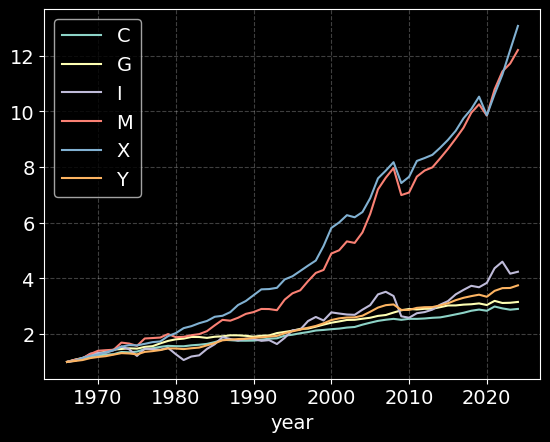

In [140]:
# a. split
nah1_grouped = nah1.groupby(['variable','unit'])
nah1_grouped_first = nah1_grouped.value.first()
nah1_grouped_first.name = 'first'

# b. apply
nah1 = nah1.set_index(['variable','unit','year'])
nah1 = nah1.join(nah1_grouped_first,how='left',on=['variable','unit'])
nah1 = nah1.reset_index()

# c. combine
nah1['indexed'] = nah1['value']/nah1['first']

# d. plot
def plot(df,variable='indexed'):
    # dark theme
    plt.style.use('dark_background')
    
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);
    
plot(nah1)

**Question:** Implement the same split-apply-combine as above using `transform`.

In [141]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_alt = nah1.copy()
grouped = nah1_alt.groupby(['variable', 'unit'])
nah1_alt['index_transform'] = grouped.value.transform(lambda x: x / first(x))
nah1_alt.head(20)

,variable,unit,year,value,first,indexed,index_transform
0,Y,real,1966,1214124.0,1214124.0,1.000000,1.000000
1,Y,nominal,1966,144582.0,144582.0,1.000000,1.000000
2,C,real,1966,587078.0,587078.0,1.000000,1.000000
3,C,nominal,1966,62576.0,62576.0,1.000000,1.000000
4,I,nominal,1966,21134.0,21134.0,1.000000,1.000000
5,I,real,1966,137948.0,137948.0,1.000000,1.000000
6,G,nominal,1966,14768.0,14768.0,1.000000,1.000000
7,G,real,1966,189310.0,189310.0,1.000000,1.000000
8,M,nominal,1966,24406.0,24406.0,1.000000,1.000000
9,M,real,1966,116721.0,116721.0,1.000000,1.000000


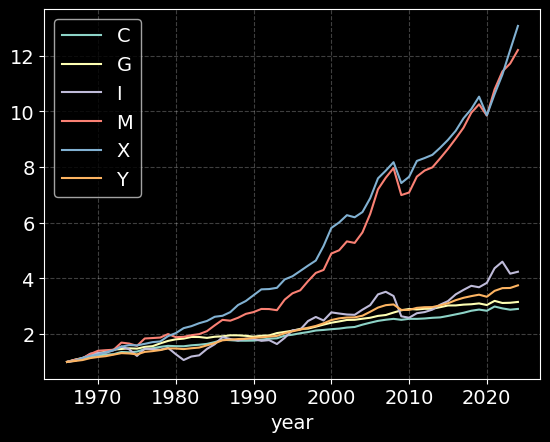

In [142]:
plot(nah1_alt,variable='index_transform')